In [7]:
import pandas as pd

In [8]:
nlp_data1=pd.read_csv('nlp_data1.csv')

### Model Selection and Training

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

X = nlp_data1['lemmatized_token']
y = nlp_data1['target']

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Perform cross-validation for each model
for name, model in models.items():
    print("Model:", name)
    cv_results = cross_validate(model, X_train, y_train, cv=5,
                                scoring=['accuracy', 'precision', 'recall', 'f1'])
    
    # Access the cross-validation results
    accuracy_scores = cv_results['test_accuracy']
    precision_scores = cv_results['test_precision']
    recall_scores = cv_results['test_recall']
    f1_scores = cv_results['test_f1']

    # Print the mean and standard deviation of each metric
    print("Accuracy: mean =", np.mean(accuracy_scores), ", std =", np.std(accuracy_scores))
    print("Precision: mean =", np.mean(precision_scores), ", std =", np.std(precision_scores))
    print("Recall: mean =", np.mean(recall_scores), ", std =", np.std(recall_scores))
    print("F1 Score: mean =", np.mean(f1_scores), ", std =", np.std(f1_scores))
    print("\n")

Model: Logistic Regression
Accuracy: mean = 0.7962233169129721 , std = 0.013099291083861493
Precision: mean = 0.8662054384938396 , std = 0.022060368238868196
Recall: mean = 0.6231857506361324 , std = 0.02248036469587554
F1 Score: mean = 0.7246382104026324 , std = 0.01924596276105079


Model: Decision Tree
Accuracy: mean = 0.7387520525451559 , std = 0.009789069662258712
Precision: mean = 0.7049501353927514 , std = 0.01502739718199736
Recall: mean = 0.6769581970192656 , std = 0.01640666514101302
F1 Score: mean = 0.6904958772347803 , std = 0.01131528900999406


Model: Random Forest
Accuracy: mean = 0.7822660098522167 , std = 0.0071649997468871554
Precision: mean = 0.8195697457678268 , std = 0.008765653080921542
Recall: mean = 0.6338655034532897 , std = 0.015974266803121338
F1 Score: mean = 0.7147474207331351 , std = 0.011384539025447548




### Confusion Matrix

Model: Logistic Regression


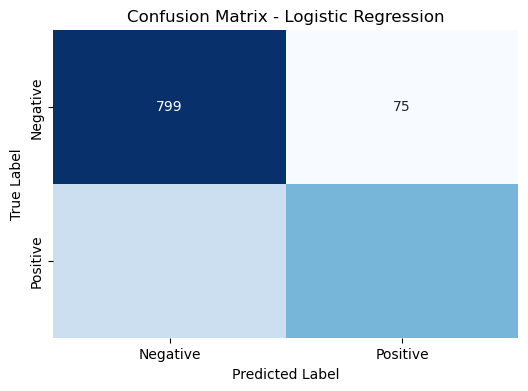

Model: Decision Tree


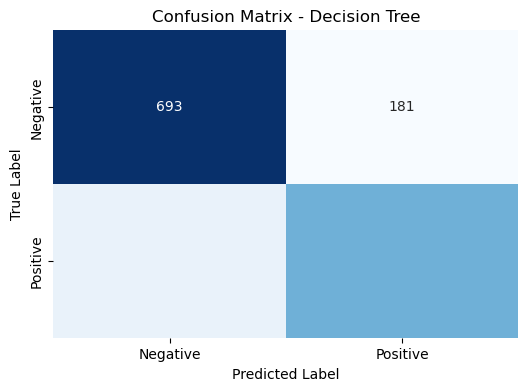

Model: Random Forest


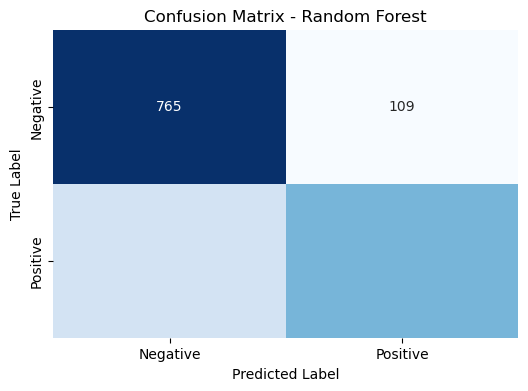

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Plot confusion matrices for each model
for name, model in models.items():
    print("Model:", name)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix - " + name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### ROC CURVE

Model: Logistic Regression


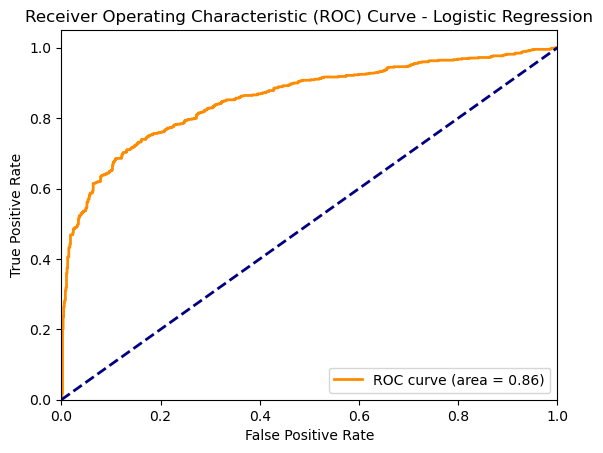

Model: Decision Tree


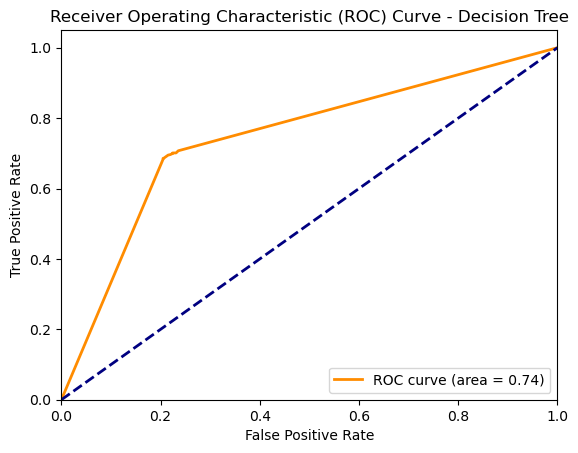

Model: Random Forest


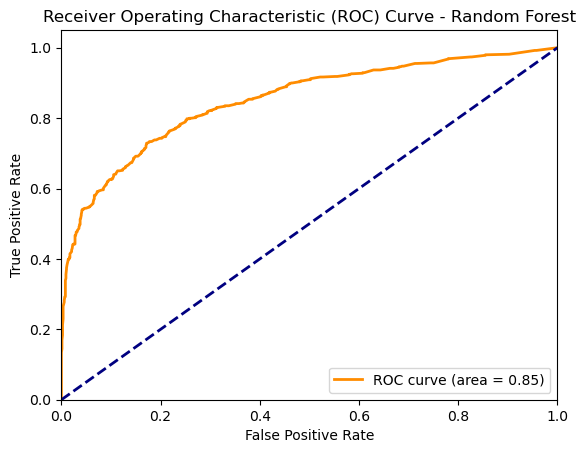

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Plot ROC curves for each model
for name, model in models.items():
    print("Model:", name)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get probability estimates of the positive class
    y_score = model.predict_proba(X_test)[:,1]  
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + name)
    plt.legend(loc="lower right")
    plt.show()

### Precision Recall Curve

Model: Logistic Regression


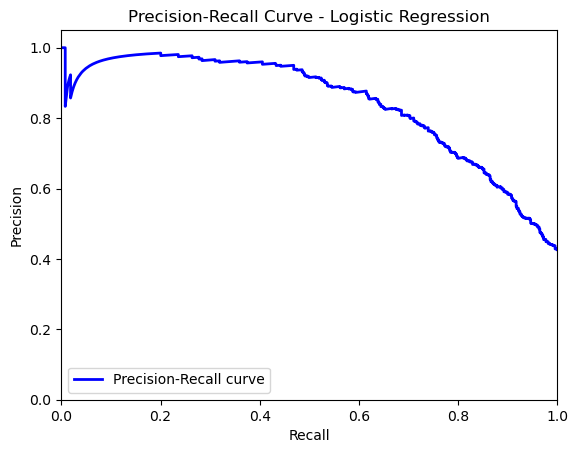

Model: Decision Tree


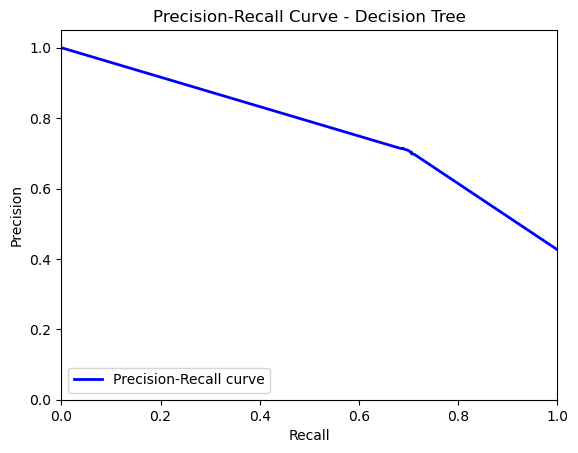

Model: Random Forest


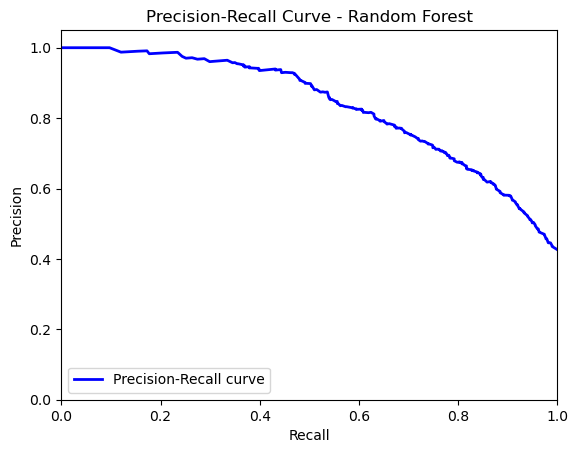

In [35]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Plot precision-recall curves for each model
for name, model in models.items():
    print("Model:", name)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get probability estimates of the positive class
    y_score = model.predict_proba(X_test)[:,1]  
    
    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    
    # Plot precision-recall curve
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve - ' + name)
    plt.legend(loc="lower left")
    plt.show()

### Hyperparameters 

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
}

# Perform hyperparameter tuning for each model
for name, model in models.items():
    print("Model:", name)
    
    # Define the parameter grid for the current model
    params = param_grid[name]
    
    # Perform grid search using 5-fold cross-validation
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters found
    print("Best Hyperparameters:", grid_search.best_params_)
    
    # Print the best cross-validation score
    print("Best Cross-validation Score:", grid_search.best_score_)
    
    # Use the best estimator to predict on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Set Accuracy:", accuracy)

Model: Logistic Regression


d:\Apps\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\App

Best Hyperparameters: {'C': 1}
Best Cross-validation Score: 0.7962233169129721
Test Set Accuracy: 0.7971109652002626
Model: Decision Tree
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10}
Best Cross-validation Score: 0.742200328407225
Test Set Accuracy: 0.7518056467498359
Model: Random Forest
Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Best Cross-validation Score: 0.7817733990147783
Test Set Accuracy: 0.7734734077478661


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions for random search
param_dist = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': randint(2, 11), 'min_samples_leaf': randint(1, 5)},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': randint(2, 11)}
}

# Perform hyperparameter tuning using random search for each model
for name, model in models.items():
    print("Model:", name)
    
    # Define the parameter distributions for the current model
    param_dist_current = param_dist[name]
    
    # Perform random search using 5-fold cross-validation
    random_search = RandomizedSearchCV(model, param_distributions=param_dist_current, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    
    # Fit the random search to the data
    random_search.fit(X_train, y_train)
    
    # Print the best hyperparameters found
    print("Best Hyperparameters:", random_search.best_params_)
    
    # Print the best cross-validation score
    print("Best Cross-validation Score:", random_search.best_score_)
    
    # Use the best estimator to predict on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Set Accuracy:", accuracy)

Model: Logistic Regression


d:\Apps\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\Apps\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

Best Hyperparameters: {'C': 1}
Best Cross-validation Score: 0.7962233169129721
Test Set Accuracy: 0.7971109652002626
Model: Decision Tree
Best Hyperparameters: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best Cross-validation Score: 0.7339901477832512
Test Set Accuracy: 0.7367038739330269
Model: Random Forest
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 8, 'n_estimators': 100}
Best Cross-validation Score: 0.7876847290640394
Test Set Accuracy: 0.7800393959290873


Model: Logistic Regression


d:\Apps\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


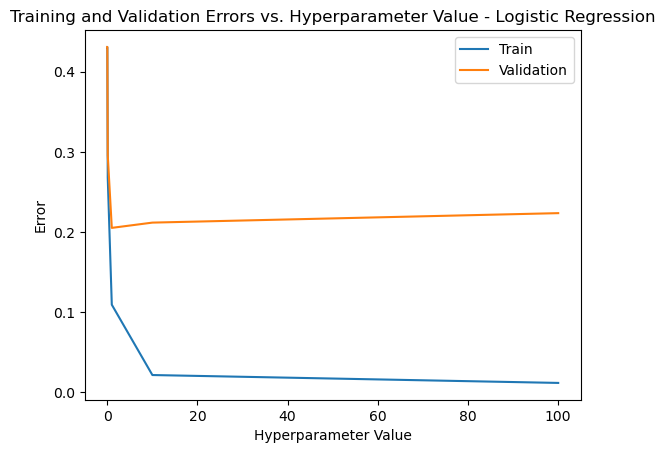

Model: Decision Tree


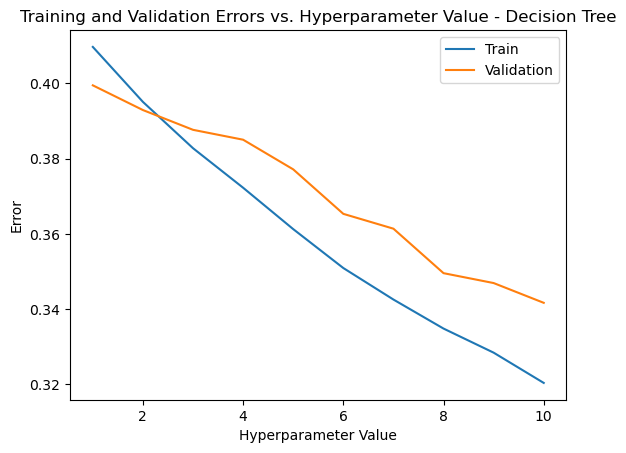

Model: Random Forest


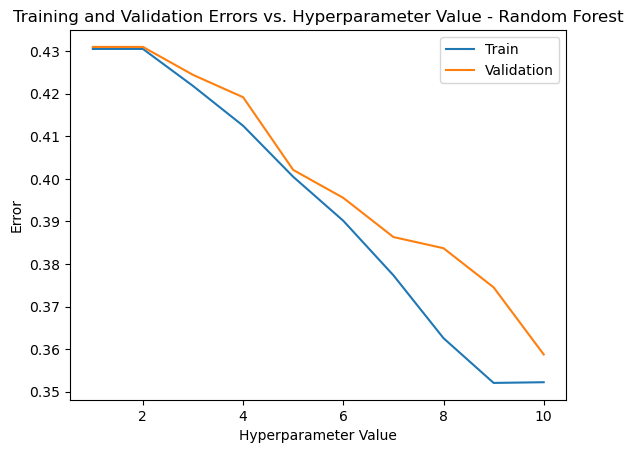

In [42]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Assuming you have already split your data into train, validation, and test sets for each model

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Define the hyperparameter ranges for each model
param_ranges = {
    'Logistic Regression': [0.001, 0.01, 0.1, 1, 10, 100],  # Example range for C in Logistic Regression
    'Decision Tree': list(range(1, 11)),  # Example range for max_depth in Decision Tree
    'Random Forest': list(range(1, 11))  # Example range for max_depth in Random Forest
}

for name, model in models.items():
    print("Model:", name)
    
    train_errors = []
    val_errors = []

    # Vary the hyperparameter (e.g., C in Logistic Regression, max_depth in DecisionTreeClassifier)
    for param_value in param_ranges[name]:
        # Adjust hyperparameters accordingly for each model
        if name == 'Logistic Regression':
            model = LogisticRegression(C=param_value)
        elif name == 'Decision Tree':
            model = DecisionTreeClassifier(max_depth=param_value)
        elif name == 'Random Forest':
            model = RandomForestClassifier(max_depth=param_value)
            
        model.fit(X_train, y_train)
        train_errors.append(1 - model.score(X_train, y_train))
        val_errors.append(1 - model.score(X_val, y_val))

    plt.plot(param_ranges[name], train_errors, label='Train')
    plt.plot(param_ranges[name], val_errors, label='Validation')
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Error')
    plt.title('Training and Validation Errors vs. Hyperparameter Value - ' + name)
    plt.legend()
    plt.show()

Model: Logistic Regression


d:\Apps\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


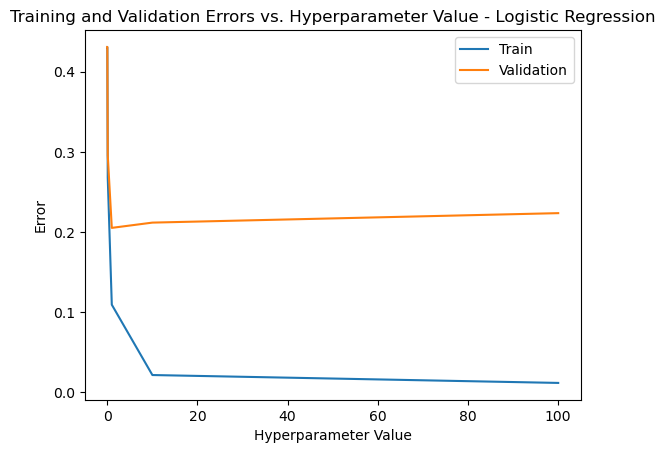

Model: Decision Tree


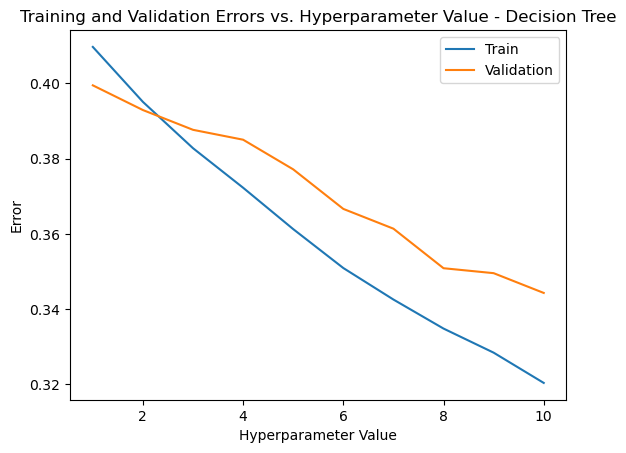

Model: Random Forest


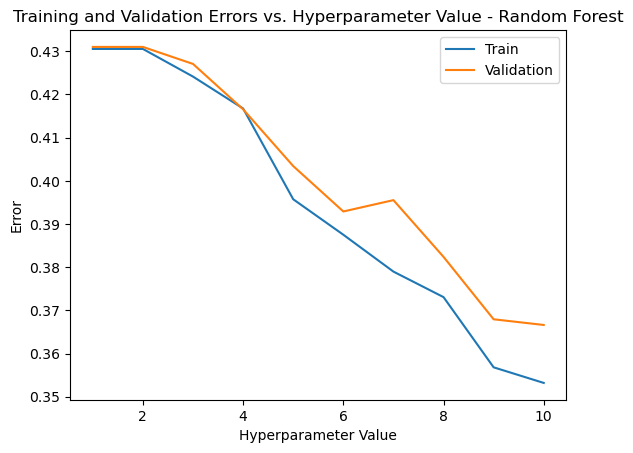

In [52]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Assuming you have already split your data into train, validation, and test sets for each model

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Define the hyperparameter ranges for each model
param_ranges = {
    'Logistic Regression': [0.001, 0.01, 0.1, 1, 10, 100],  # Example range for C in Logistic Regression
    'Decision Tree': list(range(1, 11)),  # Example range for max_depth in Decision Tree
    'Random Forest': list(range(1, 11))  # Example range for max_depth in Random Forest
}

for name, model in models.items():
    print("Model:", name)
    
    train_errors = []
    val_errors = []

    # Vary the hyperparameter (e.g., C in Logistic Regression, max_depth in DecisionTreeClassifier)
    for param_value in param_ranges[name]:
        # Adjust hyperparameters accordingly for each model
        if name == 'Logistic Regression':
            model = LogisticRegression(C=param_value)
        elif name == 'Decision Tree':
            model = DecisionTreeClassifier(max_depth=param_value)
        elif name == 'Random Forest':
            model = RandomForestClassifier(max_depth=param_value)
            
        model.fit(X_train, y_train)
        train_errors.append(1 - model.score(X_train, y_train))
        val_errors.append(1 - model.score(X_val, y_val))

    plt.plot(param_ranges[name], train_errors, label='Train')
    plt.plot(param_ranges[name], val_errors, label='Validation')
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Error')
    plt.title('Training and Validation Errors vs. Hyperparameter Value - ' + name)
    plt.legend()
    plt.show()